# Import libaries

In [2]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn==1.0.2
%pip install seaborn
%pip install pickle5

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble._forest import RandomForestRegressor
from sklearn import metrics

# Data Processing

### Link : https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data

In [4]:
#Load the data 
data = pd.read_csv('../data/gld_price_data.csv')
data.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# Number of cols and rows 
data.shape

(2290, 6)

In [6]:
# Some informations 
print(data.info())
# Check the messing values 
print("\n********************\n")
print("Number of missing value :\n")
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB
None

********************

Number of missing value :



Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

As the info method shows : 
No null values
All the values are float64 ( numerical ) which requires no processing macthing 

In [7]:
# Some statistical informations 
data.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


###  check the correlation and distribution:


cbar : the left bar ;
square : shape of the figur ; 
fmt : number of decimal points ;
annot : name of the column ;
annot_kws : size of the annotation ;
cmap : color

/tmp/ipykernel_53159/324573718.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<AxesSubplot: >

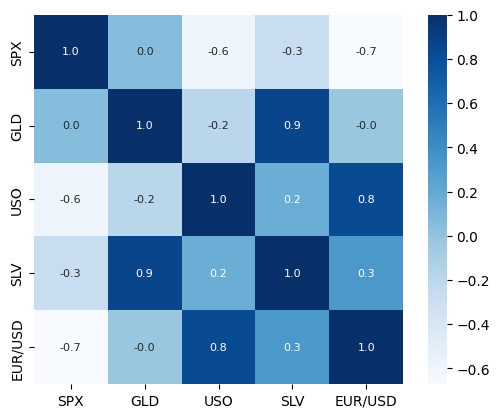

In [8]:
from matplotlib.figure import Figure
correlation = data.corr()
# heatmap 
f = Figure( figsize =(7,7) )
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

Our target is the Gold price (GLD) :
The gold price is positively correlated with Silver price ( SLV )

In [9]:
# Correlation values of Gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot: xlabel='GLD', ylabel='Density'>

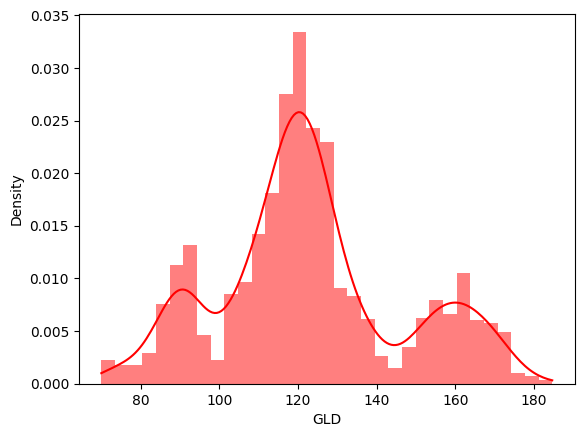

In [10]:
# Destribution 
sns.histplot(data['GLD'], color="red", label="GLD", kde=True, stat="density", linewidth=0)


# Model construction

### Splitting the data

In [11]:
# Splitting the features and Target
X = data.drop(['Date' , 'GLD'] , axis=1)
Y = data['GLD']

In [12]:
#Splitting training and test data 
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size= 0.2 , random_state =2)


### Model training

In [13]:
# declaring the model
model_regressor = RandomForestRegressor(n_estimators = 100)

In [14]:
# Training the model 
model_regressor.fit(X_train , Y_train)

RandomForestRegressor()

### Model Testing

In [15]:
# test prediction on test data
predicted_Values = model_regressor.predict(X_test)
#print(predicted_Values)

### Model Evaluation

In [16]:
error_score = metrics.r2_score(Y_test , predicted_Values)
print("R squard error : " , error_score)

R squard error :  0.9890794603459394


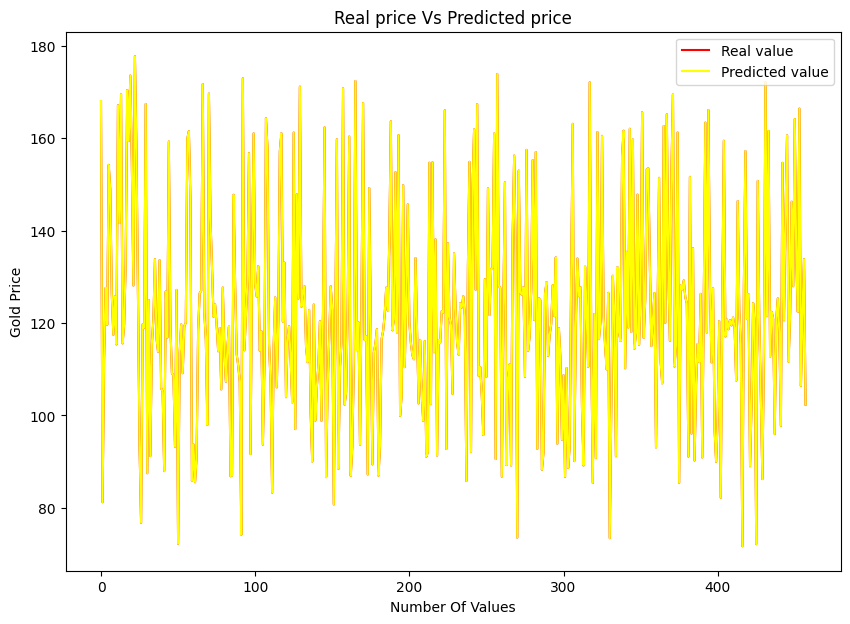

In [17]:
# Compare the real and predicted values 
Y_test = list(Y_test)
plt.figure(figsize=(10, 7))
plt.plot(Y_test , color="red" , label ="Real value")
plt.plot(Y_test , color="yellow" , label ="Predicted value")
plt.title("Real price Vs Predicted price")
plt.xlabel("Number Of Values")
plt.ylabel("Gold Price")
plt.legend()


Save the model

In [18]:
import pickle
# name of file saved
filename ="../savedModel/model.sav"
## save the 'model' with the nale 'model.sav' with a WB option => w:write , b:binary
pickle.dump(model_regressor , open(filename ,'wb'))